In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pytesseract import pytesseract 
import re

from ColorSegment import *
from rePatterns import *

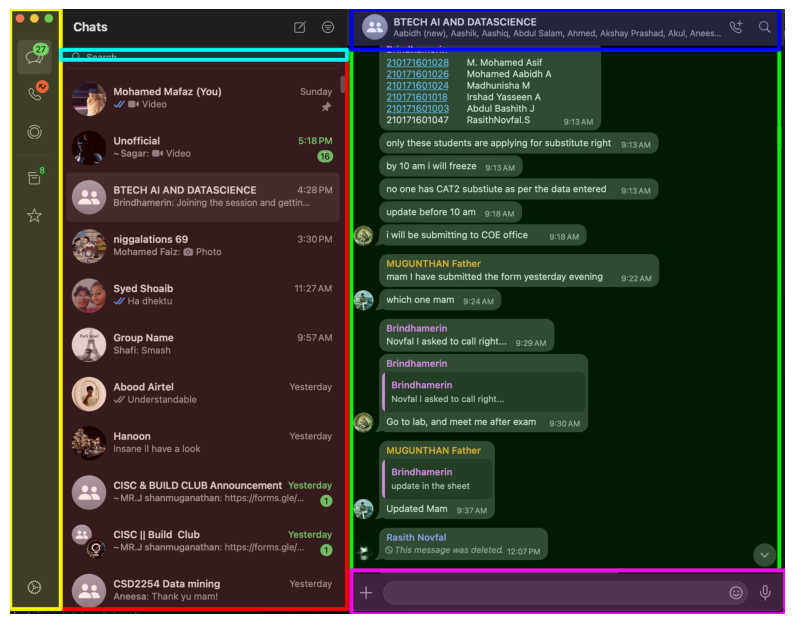

In [21]:
img_path = "Screenshot 2024-06-18 at 5.54.27 PM.png"
whatsapp_image = cv.imread(img_path)
bboxes = WhatsappSegment(whatsapp_image, alpha=0.1, show=True)

5 found!!


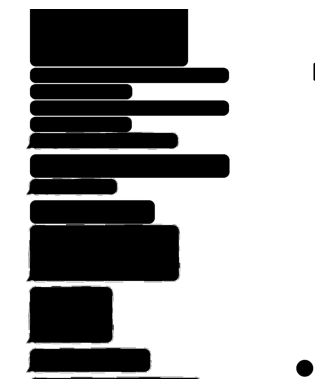

In [22]:
chat_mask_circle_removed,_ = remove_circle(img_path, ismask=False, bbox=bboxes['chat_bbox'], show=True, maxRadius=300)

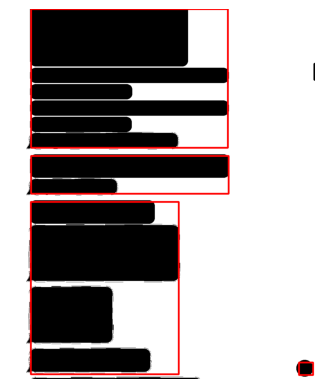

[(82, 0, 851, 543),
 (82, 575, 854, 723),
 (81, 755, 659, 1430),
 (1129, 1384, 1184, 1433)]

In [23]:
message_bbox = chat_message_bbox(chat_mask_circle_removed, show=True, blur=50)
message_bbox = sorted(message_bbox, key=lambda x: x[1])
message_bbox

In [24]:
labels = whosaid(message_bbox=message_bbox)

In [25]:
chats_dict = {}

chat_bbox = bboxes['chat_bbox']
chat_image = whatsapp_image[chat_bbox[1]:chat_bbox[3], chat_bbox[0]:chat_bbox[2]]
for label, message_box in enumerate(message_bbox):
    message = chat_image[message_box[1]:message_box[3], message_box[0]:message_box[2]]
    message_text = pytesseract.image_to_string(message)
    if message_text != '':
        time, text_without_time = extract_time_and_remove(message_text)
        if labels[label] == 0 : chats_dict[f"Sender {label}"] = {"message_text": text_without_time, "dateOrTime": time}
        else: chats_dict[f"User {label}"] = {"message_text": message_text, "dateOrTime": time}

        print(message_text)

210171601028
210171601026
210171601024
210171601018
210171601003
210171601047

M. Mohamed Asif

Mohamed Aabidh A
Madhunisha M

Irshad Yasseen A

Abdul Bashith J
RasithNovfal.S 9:13 AM

only these students are applying for substitute right 9:13am

by 10 ami will freeze 9:13am

no one has CAT2 substiute as per the dataentered 9:13AM

update before 10am 9:18AM

i will be submitting to COE office 9:18 AM

MUGUNTHAN Father
mam | have submitted the form yesterday evening 9:22 AM

which one mam _ 9:24AM

Brindhamerin
Novfal | asked to call right... 9:29am

Brindhamerin

Brindhamerin
Novfal | asked to call right...

Go to lab, and meet me after exam 9:30AM

MUGUNTHAN Father

Brindhamerin
update in the sheet

Updated Mam _ 9:37,4m

Rasith Novfal
8 This message was deleted. 12:07PM



In [26]:
chats_dict

{'Sender 0': {'message_text': '210171601028\n210171601026\n210171601024\n210171601018\n210171601003\n210171601047\n\nM. Mohamed Asif\n\nMohamed Aabidh A\nMadhunisha M\n\nIrshad Yasseen A\n\nAbdul Bashith J\nRasithNovfal.S 9:13 AM\n\nonly these students are applying for substitute right \n\nby 10 ami will freeze \n\nno one has CAT2 substiute as per the dataentered \n\nupdate before 10am \n\ni will be submitting to COE office 9:18 AM',
  'dateOrTime': '9:13am'},
 'Sender 1': {'message_text': 'MUGUNTHAN Father\nmam | have submitted the form yesterday evening 9:22 AM\n\nwhich one mam _',
  'dateOrTime': '9:24AM'},
 'Sender 2': {'message_text': 'Brindhamerin\nNovfal | asked to call right... \n\nBrindhamerin\n\nBrindhamerin\nNovfal | asked to call right...\n\nGo to lab, and meet me after exam \n\nMUGUNTHAN Father\n\nBrindhamerin\nupdate in the sheet\n\nUpdated Mam _ 9:37,4m\n\nRasith Novfal\n8 This message was deleted.',
  'dateOrTime': '9:29am'}}

In [27]:
history_bbox = bboxes['history_bbox']
history_image = whatsapp_image[history_bbox[1]:history_bbox[3],history_bbox[0]:history_bbox[2]]
history_mask = extract_color(history_image, (0,0,30), (0,0,50), blur=(0,0), show=False)
history_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

20 found!!


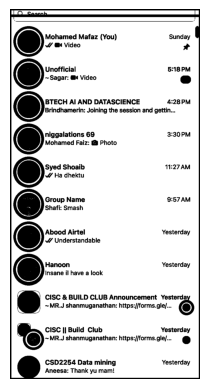

In [36]:
_, circles = remove_circle(history_mask.copy(), ismask=True, bbox=bboxes['history_bbox'], show=True, maxRadius=300, minDist=0.01,
              param1=50, param2=90, dp=1, circle_color = (0,255,0), thickness=10)

In [37]:
circles = sorted(circles, key=lambda x: x[1])
circles

[array([ 78, 136,  49]),
 array([ 78, 136,  49]),
 array([ 78, 272,  49]),
 array([ 78, 274,  49]),
 array([ 78, 410,  49]),
 array([ 78, 410,  49]),
 array([ 80, 410,  49]),
 array([ 78, 546,  49]),
 array([ 78, 548,  48]),
 array([ 78, 686,  49]),
 array([ 80, 686,  49]),
 array([ 78, 686,  50]),
 array([ 78, 820,  48]),
 array([ 78, 822,  49]),
 array([ 78, 958,  49]),
 array([  78, 1094,   49]),
 array([  78, 1096,   49]),
 array([  78, 1098,   50]),
 array([ 740, 1256,   17]),
 array([  98, 1390,   29])]

In [38]:
history_dict = {}

for cirlce in circles:
    x1 = cirlce[0]+cirlce[2]
    y1 = cirlce[1]-cirlce[2]
    x2 = history_mask.shape[-1]
    y2 = cirlce[1]+cirlce[2]
    history_text = pytesseract.image_to_string(history_image[y1:y2,x1:x2])
    print(history_text)

    name_and_date = history_text.split('\n')[0]
    if name_and_date != '':
        name, date = ''.join(name_and_date.split()[:-1]), ''.join(name_and_date.split()[-1])

        bottom_text = history_text.split('\n')[1:]
        if len(bottom_text) > 1:
            bottom_text = bottom_text[0]
            num_message, histroy_message = extract_and_remove_number(bottom_text)
            
        history_dict[name] = {'dateOrTime': date, 'histroy_message': histroy_message, 'num_message': num_message}

Mohamed Mafaz (You) Sunday
W @t Video P

Mohamed Mafaz (You) Sunday
W @t Video P

Unofficial 5:18 PM
~ Sagar: @¢ Video (16)

Unofficial 5:18 PM
~ Sagar: @¢ Video (16)

BTECH Al AND DATASCIENCE 4:28PM
Brindhamerin: Joining the session and gettin...

BTECH Al AND DATASCIENCE 4:28PM
Brindhamerin: Joining the session and gettin...

BTECH Al AND DATASCIENCE 4:28PM
Brindhamerin: Joining the session and gettin...

niggalations 69 3:30PM
Mohamed Faiz: @ Photo

niggalations 69 3:30PM
_ Mohamed Faiz: @ Photo

Syed Shoaib 11:27 AM
W Ha dhektu

Syed Shoaib 11:27 AM
W Ha dhektu

Syed Shoaib 11:27 AM
W Ha dhektu

Group Name 9:57AM

Shafi: Smash

Group Name 9:57AM
Shafi: Smash

Abood Airtel Yesterday
W Understandable

Hanoon Yesterday
Insane il have a look

Hanoon Yesterday
Insane il have a look

Hanoon Yesterday
Insane il have a look


~MR.J shanmuganathan: https://forms.gle/... 1)



In [31]:
history_dict

{'MohamedMafaz(You)': {'dateOrTime': 'Sunday',
  'histroy_message': 'W @t Video P',
  'num_message': None},
 'Unofficial5:18': {'dateOrTime': 'PM',
  'histroy_message': '~ Sagar: @¢ Video',
  'num_message': 16},
 'BTECHAlANDDATASCIENCE': {'dateOrTime': '4:28PM',
  'histroy_message': 'Brindhamerin: Joining the session and gettin...',
  'num_message': None},
 'niggalations69': {'dateOrTime': '3:30PM',
  'histroy_message': '_ Mohamed Faiz: @ Photo',
  'num_message': None},
 'SyedShoaib11:27': {'dateOrTime': 'AM',
  'histroy_message': 'W Ha dhektu',
  'num_message': None},
 'GroupName': {'dateOrTime': '9:57AM',
  'histroy_message': 'Shafi: Smash',
  'num_message': None},
 'AboodAirtel': {'dateOrTime': 'Yesterday',
  'histroy_message': 'W Understandable',
  'num_message': None},
 'Hanoon': {'dateOrTime': 'Yesterday',
  'histroy_message': 'Insane il have a look',
  'num_message': None},
 '~MR.Jshanmuganathan:https://forms.gle/...': {'dateOrTime': '1)',
  'histroy_message': 'Insane il have a 

In [32]:
name_bbox = bboxes['name_bbox']
name_image = whatsapp_image[name_bbox[1]:name_bbox[3],name_bbox[0]:name_bbox[2]]
names = pytesseract.image_to_string(name_image).split('\n')
if len(names) > 1:
    name_dict = {"name":names[0], "participants":names[1]}
else:
    name_dict = {"name":names[0], "participants":None}
name_dict

{'name': 'BTECH Al AND DATASCIENCE et Q',
 'participants': 'Aabidh (new), Aashik, Aashiq, Abdul Salam, Ahmed, Akshay Prashad, Akul, Anees...'}

In [33]:
chats_dict

{'Sender 0': {'message_text': '210171601028\n210171601026\n210171601024\n210171601018\n210171601003\n210171601047\n\nM. Mohamed Asif\n\nMohamed Aabidh A\nMadhunisha M\n\nIrshad Yasseen A\n\nAbdul Bashith J\nRasithNovfal.S 9:13 AM\n\nonly these students are applying for substitute right \n\nby 10 ami will freeze \n\nno one has CAT2 substiute as per the dataentered \n\nupdate before 10am \n\ni will be submitting to COE office 9:18 AM',
  'dateOrTime': '9:13am'},
 'Sender 1': {'message_text': 'MUGUNTHAN Father\nmam | have submitted the form yesterday evening 9:22 AM\n\nwhich one mam _',
  'dateOrTime': '9:24AM'},
 'Sender 2': {'message_text': 'Brindhamerin\nNovfal | asked to call right... \n\nBrindhamerin\n\nBrindhamerin\nNovfal | asked to call right...\n\nGo to lab, and meet me after exam \n\nMUGUNTHAN Father\n\nBrindhamerin\nupdate in the sheet\n\nUpdated Mam _ 9:37,4m\n\nRasith Novfal\n8 This message was deleted.',
  'dateOrTime': '9:29am'}}

In [34]:
history_dict

{'MohamedMafaz(You)': {'dateOrTime': 'Sunday',
  'histroy_message': 'W @t Video P',
  'num_message': None},
 'Unofficial5:18': {'dateOrTime': 'PM',
  'histroy_message': '~ Sagar: @¢ Video',
  'num_message': 16},
 'BTECHAlANDDATASCIENCE': {'dateOrTime': '4:28PM',
  'histroy_message': 'Brindhamerin: Joining the session and gettin...',
  'num_message': None},
 'niggalations69': {'dateOrTime': '3:30PM',
  'histroy_message': '_ Mohamed Faiz: @ Photo',
  'num_message': None},
 'SyedShoaib11:27': {'dateOrTime': 'AM',
  'histroy_message': 'W Ha dhektu',
  'num_message': None},
 'GroupName': {'dateOrTime': '9:57AM',
  'histroy_message': 'Shafi: Smash',
  'num_message': None},
 'AboodAirtel': {'dateOrTime': 'Yesterday',
  'histroy_message': 'W Understandable',
  'num_message': None},
 'Hanoon': {'dateOrTime': 'Yesterday',
  'histroy_message': 'Insane il have a look',
  'num_message': None},
 '~MR.Jshanmuganathan:https://forms.gle/...': {'dateOrTime': '1)',
  'histroy_message': 'Insane il have a 

In [35]:
name_dict

{'name': 'BTECH Al AND DATASCIENCE et Q',
 'participants': 'Aabidh (new), Aashik, Aashiq, Abdul Salam, Ahmed, Akshay Prashad, Akul, Anees...'}